<a href="https://colab.research.google.com/github/UniVR-DH/ADHLab/blob/main/lecture06_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimenting with Word Frequencies


<img src="https://drive.google.com/uc?export=view&id=1m_EMdnI5C826kgqK7r5vB4TXnB0-Wq7W" alt="Intestazione con loghi istituzionali" width="525"/>

| Docente      | Insegnamento | Anno Accademico    |
| :---        |    :----   |          ---: |
| Matteo Lissandrini      | Laboratorio Avanzato di Informatica Umanistica       | 2024/2025   |

## Usual install and basic imports

In [ ]:
%pip install wikipedia-api

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.7.1-py3-none-any.whl size=14346 sha256=cd27877f17a1cef9d877786a7dad1ff46831a0f08c11f4d5c1152e32de451118
  Stored in directory: /root/.cache/pip/wheels/4c/96/18/b9201cc3e8b47b02b510460210cfd832ccf10c0c4dd0522962
Successfully built wikipedia-api


In [ ]:
import gzip
import math
import string
import numpy as np

import regex as re

import matplotlib.pyplot as plt

from collections import Counter

## Declare Wikipedia API Object to download pages

In [ ]:
import wikipediaapi
wapi_text = wikipediaapi.Wikipedia('MyProjectName (name@studenti.univr.it)',
                                   'en',
                                   extract_format=wikipediaapi.ExtractFormat.WIKI)

punct_regex = re.compile('[{}]'.format(re.escape(string.punctuation))) # Regex matching any punctuation
space_regex = re.compile(' +') # Regex matching whitespace

### Download two pages, verify the properties of word frequencies

**Compare different pages and the same page in different languages**

In [ ]:
page_py = wapi_text.page('New York City')
print("Page - Exists: %s" % page_py.exists())

page_tokens = space_regex.sub(' ', punct_regex.sub(' ', page_py.text.lower())).strip().split()
print("Tokens: ", len(page_tokens))
# Create the bag of words
page_bow = Counter(page_tokens)

print("Distinct tokens: ", len(page_bow))

Page - Exists: True
Tokens:  15797
Distinct tokens:  3392


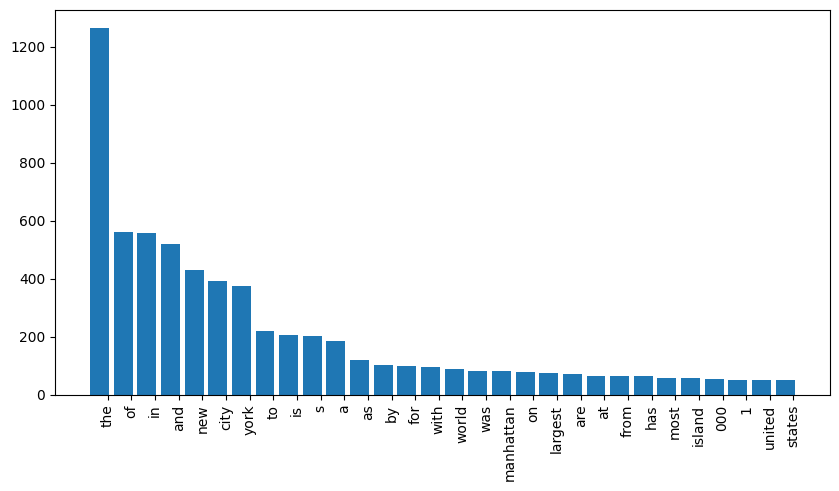

In [ ]:
words, counts = zip(*page_bow.most_common(30))
indexes = np.arange(len(words))

bar_width = 0.35

# Prepare figure with bars
plt.figure(figsize=(10,5))
plt.bar(indexes, counts)

# add labels
plt.xticks(indexes + bar_width, words, rotation=90)
plt.show()

In [ ]:
print(page_py.langlinks.keys())

dict_keys(['af', 'als', 'am', 'an', 'ang', 'ar', 'arc', 'ary', 'arz', 'as', 'ast', 'av', 'awa', 'ay', 'az', 'azb', 'ba', 'ban', 'bar', 'bat-smg', 'bcl', 'be', 'be-x-old', 'bew', 'bg', 'bh', 'bi', 'bjn', 'bm', 'bn', 'bo', 'br', 'bs', 'bug', 'bxr', 'ca', 'cbk-zam', 'cdo', 'ce', 'ceb', 'ch', 'ckb', 'co', 'crh', 'cs', 'cu', 'cv', 'cy', 'da', 'dag', 'de', 'diq', 'dsb', 'dty', 'ee', 'el', 'eml', 'eo', 'es', 'et', 'eu', 'ext', 'fa', 'ff', 'fi', 'fiu-vro', 'fj', 'fo', 'fr', 'frp', 'frr', 'fur', 'fy', 'ga', 'gag', 'gan', 'gcr', 'gd', 'gl', 'glk', 'gn', 'got', 'gu', 'gv', 'ha', 'hak', 'he', 'hi', 'hif', 'hr', 'hsb', 'ht', 'hu', 'hy', 'hyw', 'ia', 'iba', 'id', 'ie', 'ig', 'ik', 'ilo', 'inh', 'io', 'is', 'it', 'ja', 'jam', 'jbo', 'jv', 'ka', 'kaa', 'kab', 'kbp', 'kge', 'ki', 'kk', 'km', 'kn', 'ko', 'krc', 'ks', 'ku', 'kw', 'ky', 'la', 'lad', 'lb', 'lez', 'lfn', 'li', 'lij', 'lld', 'lmo', 'ln', 'lo', 'lt', 'lv', 'mai', 'map-bms', 'mdf', 'mg', 'mhr', 'mi', 'min', 'mk', 'ml', 'mn', 'mni', 'mr', 'mrj'

In [ ]:
page_py_it = page_py.langlinks['it']

print(page_py_it.text[-140:])

# Create the bag of words
page_bow_it = Counter(space_regex.sub(' ', punct_regex.sub(' ', page_py_it.text.lower())).strip().split())

print(len(page_bow_it))

Open Library, Internet Archive. 
(EN) New York (insediamento umano) / City of New York (city), su Geographic Names Information System, USGS.
3506


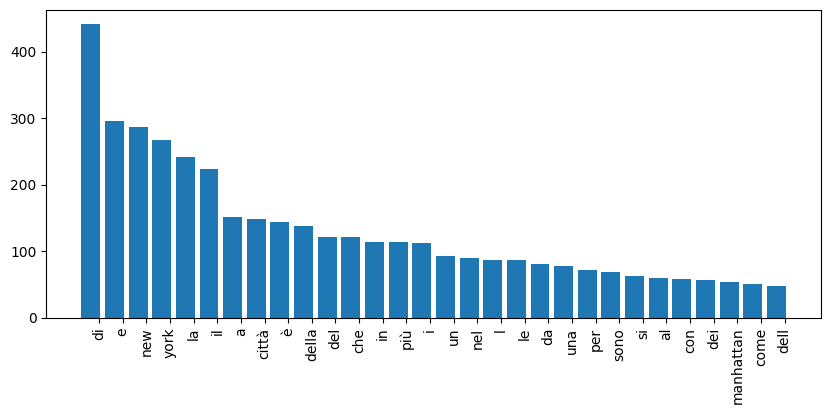

In [ ]:
words, counts = zip(*page_bow_it.most_common(30))

indexes = np.arange(len(words))

bar_width = 0.35


plt.figure(figsize=(10,4))
plt.bar(indexes, counts)

# add labels
plt.xticks(indexes + bar_width, words, rotation=90)
plt.show()

In [ ]:
# TODO: Try repeat the code above with a new page or a different language





## Use Word and Character Frequency to classify text

This function extracts and processes Wikipedia article summaries in different languages. It takes a Wikipedia page object and a list of desired languages as input. For each specified language, it gets the summary of the article in that language, optionally removes punctuation if requested, and returns a list of tuples containing the processed text and language code. It essentially helps collect the same article's summaries across different language versions of Wikipedia.

For example, if you had an article about "Dog" and passed in `languages=['es', 'fr']`, it would get you the Spanish and French summaries of the Dog article. The output would be something like `[('Spanish summary text', 'es'), ('French summary text', 'fr')]`.

In [ ]:
def extract_lang_version(_page, languages, remove_punct=False):
  langlinks = _page.langlinks
  language_versions = []

  for k in sorted(langlinks.keys()):
    if k not in languages:
      continue
    v = langlinks[k]
    page_text = v.summary
    if remove_punct:
      page_text = page_text.translate(str.maketrans('', '', string.punctuation))

    language_versions.append((page_text,k))
    # print("%s: %s - %s: %s - %s" % (k, v.language, v.title, v.fullurl, v.summary))
  return language_versions

In [ ]:
train_pages = ['New York City', 'Rome', 'Berlin', 'Buenos Aires', 'Beijing', 'Budapest', 'Canberra', 'Prague', 'Madrid', 'Moscow', 'Vienna', 'Warsaw', 'Oslo', 'Porto']
test_pages = ['Addis Ababa',  'Tom Sawyer', 'Johannes Gutenberg', 'Marcel Proust', 'Google', ' Statoil']
languages = set(['als','en', 'es', 'fo', 'fr', 'da','de', 'hu', 'pl', 'pt', 'ru', 'nl', 'nov'])

In [ ]:
training_set = []
for page_name in train_pages:
  page_py = wapi_text.page(page_name)
  training_set.extend(extract_lang_version(page_py, languages, True))

print("extracted text for {} training pages".format(len(training_set)))

extracted text for 165 training pages


In [ ]:
test_set = []
for page_name in test_pages:
  page_py = wapi_text.page(page_name)
  test_set.extend(extract_lang_version(page_py, languages, True))

print("extracted text for {} test pages".format(len(test_set)))

extracted text for 55 test pages


### Testing the application of
[Less is More: Parameter-Free Text Classification with Gzip](https://arxiv.org/pdf/2212.09410.pdf)

This code implements a language detection system using compression-based classification (specifically the NCD - Normalized Compression Distance algorithm) with a k-Nearest Neighbors (k=5) approach. Here's what it does:

1. For each test document, it compares it to all training documents by:
   - Compressing both documents separately and together
   - Calculating their similarity using a compression-based distance formula
   - Finding the 5 most similar training documents
   - Predicting the language by taking the most common language among these 5 documents

2. It keeps track of accuracy in two ways:
   - Macro accuracy: overall percentage of correct predictions
   - Micro accuracy: accuracy broken down by each language

Finally, it prints the overall accuracy and the accuracy per language.

The interesting part is that it uses file compression (gzip) as a way to measure text similarity - the idea being that if two texts are similar, their compressed combination won't be much larger than their individual compressions. This is a clever way to detect language without needing to understand the actual words or grammar.


In [ ]:
training_set=np.array(training_set)
test_set=np.array(test_set)

macro_accuracy = 0
micro_accuracy = { l:0 for l in languages}

count_l = { l:0 for l in languages}


print("{:6}{:6} ".format("True", "Pred."), "Text" ) # print prediction and sample text
for (x1 , real) in test_set: # for each document for which we want to predict
   Cx1 = len(gzip.compress(x1.encode ())) # compress it and checj the compression size
   distance_from_x1 = []

   for (x2 , _) in training_set: # for each reference document (for which we know the language)
      Cx2 = len(gzip.compress(x2.encode ())) # compress the document
      x1x2 = " ".join([x1 , x2]) # concatenate the test and the reference docs
      Cx1x2 = len(gzip.compress(x1x2.encode ())) # compress this new concatenated
      ncd = (Cx1x2 - min(Cx1 , Cx2)) / max( Cx1 , Cx2 ) # compare the compression ratio using formula from the paper
      distance_from_x1.append( ncd ) # use this value as "similarity"

   k=5 # <- decide to compare to the best 5

   sorted_idx = np.argsort(np.array(distance_from_x1)) # sort documents
   top_k_class = list(training_set[sorted_idx[:k], 1]) # find which are the top5 documents
   predict_class = max(set(top_k_class) , key=top_k_class.count ) # compute the majority of votes

   print("{:6}{:6} ".format(real, predict_class), x1[:30] ) # print prediction and sample text
   count_l[real]+=1

   if real == predict_class:
    macro_accuracy+=1
    micro_accuracy[real]+=1


print("\n\n")
print("Macro accuracy", macro_accuracy/len(test_set))

for l in languages:
  if count_l[l] > 0:
    print(l, count_l[l], micro_accuracy[l]/count_l[l])

True  Pred.   Text
da    da      Addis Ababa også Addis Abeba e
de    als     Addis Abeba adˈɪs ˈaːbeba auch
es    es      Adís Abeba1​2​ del amhárico አዲ
fo    fo      Høvuðsstaðurin í Etiopia Addis
fr    pl      AddisAbeba adis‿abeba  en amha
hu    hu      AddiszAbeba Etiópia fővárosa é
nl    nl      Addis Abeba Amhaars አዲስ አበባ ni
pl    pl      Addis Abeba amh አዲስ አበባ „Nowy 
pt    pt      Adis Abeba em amárico አዲስ አበባ 
ru    ru      Адди́сАбе́ба амх አዲስ አበባ — «но
es    als     Tom Sawyer es el personaje pri
fr    nov     Tom Sawyer est un personnage d
nl    nov     Tom Sawyer is een personage be
pl    pl      Tom Sawyer – postać fikcyjna t
pt    pt      Tom Sawyer é o personagem prin
ru    ru      То́мас «Том» Со́йер англ Thoma
als   als     Dr Johannes Gensfleisch bekann
da    da      Johann Gutenberg født 1394 død
de    de      Johannes Gutenberg  um 1400 in
es    es      Johannes Gensfleisch zur Laden
fr    fr      Johannes Gensfleisch zur Laden
hu    hu      Johannes Gensfleisch z

# Processing PDF documents

We are going to use utilities in the langchain library:

- To load text from PDF:  https://python.langchain.com/docs/how_to/document_loader_pdf/

- To split text:   https://python.langchain.com/docs/how_to/recursive_text_splitter/

-

In [ ]:
%pip install langchain langchain-community pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36


In [3]:
!wget  'https://d1io3yog0oux5.cloudfront.net/_11d435a500963f99155ee058df09f574/intel/db/887/9014/earnings_release/Q1+24_EarningsRelease_FINAL.pdf' -O intel_q1_2024_earnings.pdf

--2024-11-20 21:53:50--  https://d1io3yog0oux5.cloudfront.net/_11d435a500963f99155ee058df09f574/intel/db/887/9014/earnings_release/Q1+24_EarningsRelease_FINAL.pdf
Resolving d1io3yog0oux5.cloudfront.net (d1io3yog0oux5.cloudfront.net)... 18.65.226.174, 18.65.226.120, 18.65.226.115, ...
Connecting to d1io3yog0oux5.cloudfront.net (d1io3yog0oux5.cloudfront.net)|18.65.226.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133510 (130K) [application/pdf]
Saving to: ‘intel_q1_2024_earnings.pdf’

intel_q1_2024_earni 100%[===================>] 130.38K   718KB/s    in 0.2s    

2024-11-20 21:53:51 (718 KB/s) - ‘intel_q1_2024_earnings.pdf’ saved [133510/133510]



In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader
loader = PyPDFLoader("intel_q1_2024_earnings.pdf")
data = loader.load()

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
all_splits = text_splitter.split_documents(data)

In [ ]:
all_splits[0]

Document(metadata={'source': 'intel_q1_2024_earnings.pdf', 'page': 0}, page_content='Intel Corporation\n2200 Mission College Blvd.\nSanta Clara, CA 95054-1549\n                                                         \nNews Release\n Intel Reports First-Quarter 2024 Financial Results\nNEWS SUMMARY\n▪ First-quarter revenue of $12.7 billion, up 9% year over year (YoY).\n▪ First-quarter GAAP earnings (loss) per share (EPS) attributable to Intel was $(0.09); non-GAAP EPS \nattributable to Intel was $0.18.')

In [ ]:
all_splits[1]

Document(metadata={'source': 'intel_q1_2024_earnings.pdf', 'page': 0}, page_content='▪ Forecasting second-quarter 2024 revenue of $12.5 billion to $13.5 billion; expecting second-quarter EPS of \n$(0.05); non-GAAP EPS of $0.10.\nSANTA CLARA, Calif., April 25, 2024 – Intel Corporation today reported first-quarter 2024 financial results.\n“We are making steady progress against our priorities and delivered a solid quarter,” said Pat Gelsinger, Intel CEO. \n“Strong innovation across our client, edge and data center portfolios drove double-digit revenue growth in Intel')

In [7]:
%pip install spacy
%pip install spacypdfreader pdf2image pytesseract

### spacypdfreader

`spacypdfreader` is a Python library that allows you to convert PDF files directly into spaCy Doc objects.

https://spacy.io/universe/project/spacypdfreader

The library provides several built in parsers or bring your own parser. Doc objects are annotated with several custom attributes including: token._.page_number, doc._.page_range, doc._.first_page, doc._.last_page, doc._.pdf_file_name, and doc._.page(int).

In [8]:
import spacy
from spacypdfreader.spacypdfreader import pdf_reader

nlp = spacy.load('en_core_web_sm')
doc = pdf_reader('intel_q1_2024_earnings.pdf', nlp)

# Get the page number of any token.
print(doc[0]._.page_number)  # 1
print(doc[-1]._.page_number) # 14

# Get page meta data about the PDF document.
print(doc._.pdf_file_name)   # 'intel_q1_2024_earnings.pdf'
print(doc._.page_range)      # (1, 14)
print(doc._.first_page)      # 1
print(doc._.last_page)       # 14

# Get all of the text from a specific PDF page.
print(doc._.page(4))

/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


1
14
intel_q1_2024_earnings.pdf
(1, 14)
1
14
Intel/Page 4

•

•

•

•

•

•

•

•
•

•

•

•

•

•

•

•

•

•

•

•

•

•

•

our business plans and strategy and anticipated benefits therefrom, including with respect to our IDM 2.0 
strategy, Smart Capital strategy, partnership with Brookfield, internal foundry model, updated reporting structure, 
and AI strategy;

projections of our future financial performance, including future revenue, gross margins, capital expenditures, 
and cash flows;

projected costs and yield trends;

future cash requirements, the availability, uses, sufficiency, and cost of capital resources, and sources of 
funding, including for future capital and R&D investments and for returns to stockholders, such as stock 
repurchases and dividends, and credit ratings expectations;

future products, services, and technologies, and the expected goals, timeline, ramps, progress, availability, 
production, regulation, and benefits of such products, services, and technolog